# Radar Water Level Monitoring

Here you can find some examples of data processing and plotting.

[data](https://o365coloradoedu-my.sharepoint.com/:f:/r/personal/chhe5305_colorado_edu/Documents/Radar%20Water%20Monitoring/RWM?csf=1&web=1&e=bF4kS6)

In [1]:
import os
import pickle

from src import data_utils as utils, plots as plot

%matplotlib inline


data_file = os.path.expanduser('~/data/deployment_nov2023/processed_data.pkl')

## Load Data

In [2]:
with open(data_file, 'rb') as f:
    data = pickle.load(f)

dates, gt, awr1843, iwr1443 = data['dates'], data['ground_truth'], data['AWR1843'], data['IWR1443']
gt_dates, gt_depths = gt
len(dates), len(gt_dates), len(gt_depths)

(114, 746, 746)

## Process Data

In [3]:
gt_dates_filtered, gt_depths_filtered = utils.filter_gt(gt_dates, gt_depths, min_depth_threshold=0.1)
print(len(gt_dates_filtered), len(gt_depths_filtered))

gt_depths_matched = utils.match_gt_to_timestamps(dates, gt_dates_filtered, gt_depths_filtered)
print(len(gt_depths_matched))

475 475
114


In [4]:
y_threshold=0.1
x_limit=2
window_size=10
y_limit = 4

In [5]:
awr1843_filtered = utils.filter_points(awr1843, y_threshold=y_threshold, x_limit=x_limit, y_limit=y_limit)
iwr1443_filtered = utils.filter_points(iwr1443, y_threshold=y_threshold, x_limit=x_limit, y_limit=y_limit)
# awr1843_filtered, iwr1443_filtered = utils.filter_points(awr1843), utils.filter_points(iwr1443)
awr1843_stats = utils.compute_statistics(awr1843_filtered, window_size=window_size)
iwr1443_stats = utils.compute_statistics(iwr1443_filtered, window_size=window_size)

100%|██████████| 114/114 [00:00<00:00, 303.25it/s]


## Plot Data

### AWR 1843

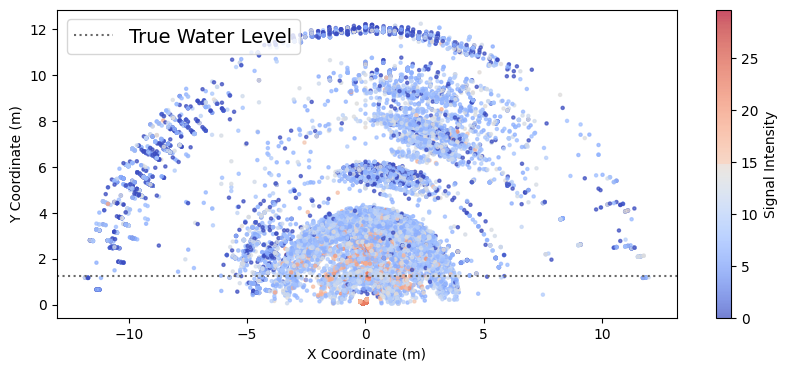

In [6]:
plot.points(awr1843, run_index=0, figsize=(10, 4), save_filename='1843_points_raw.png', gt_level=1.251)

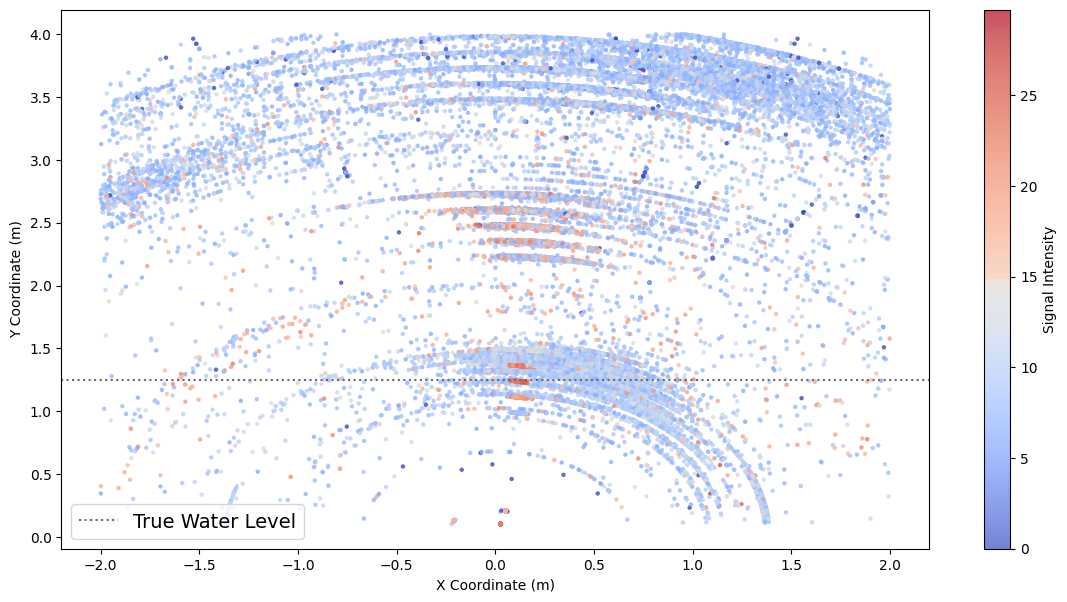

In [7]:
plot.points(awr1843_filtered, run_index=0, figsize=(14, 7), save_filename='1843_points_filtered.png', gt_level=1.251)

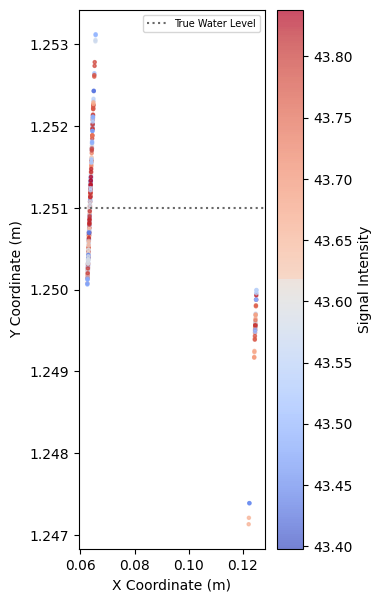

In [10]:
plot.points(iwr1443_filtered, run_index=0, figsize=(3, 7), save_filename='1443_points_raw.png', gt_level=1.251)

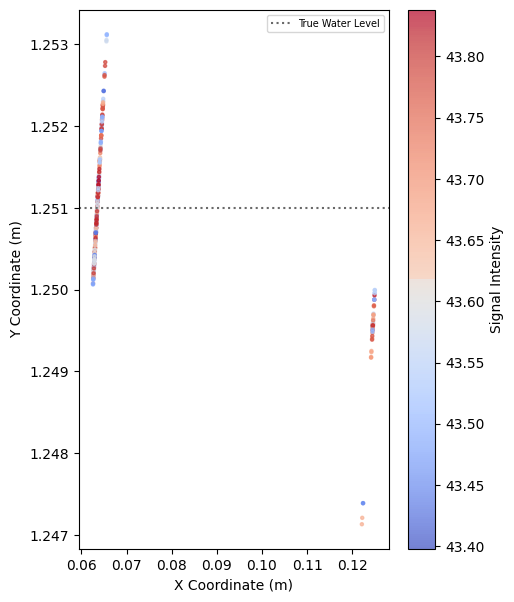

In [16]:
plot.points(iwr1443_filtered, run_index=0, figsize=(5, 7), save_filename='1443_points_filtered.png', gt_level=1.251)

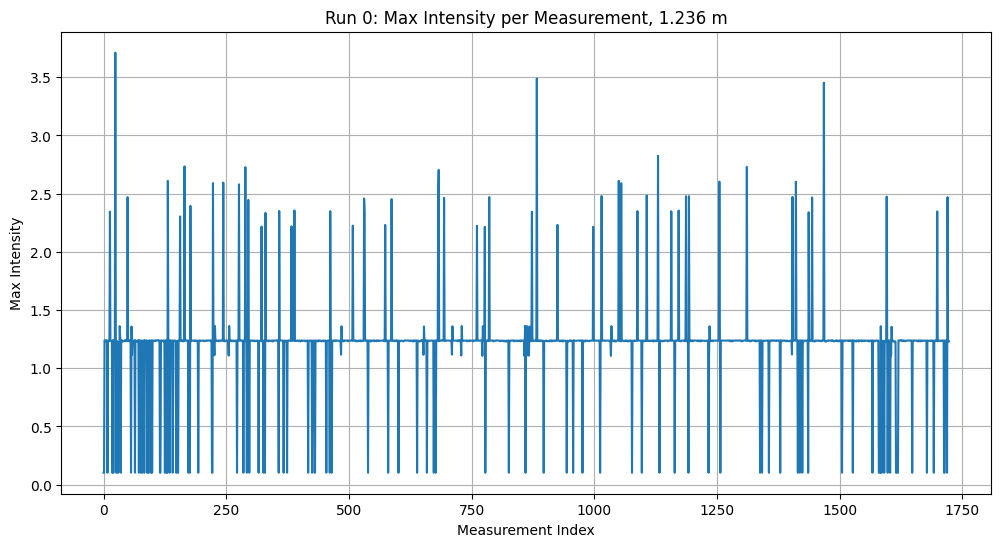

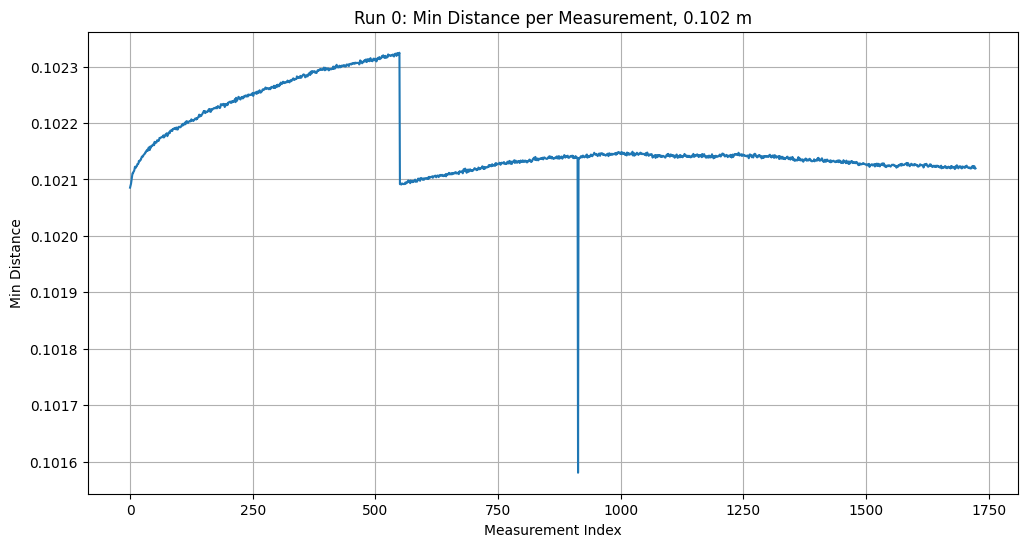

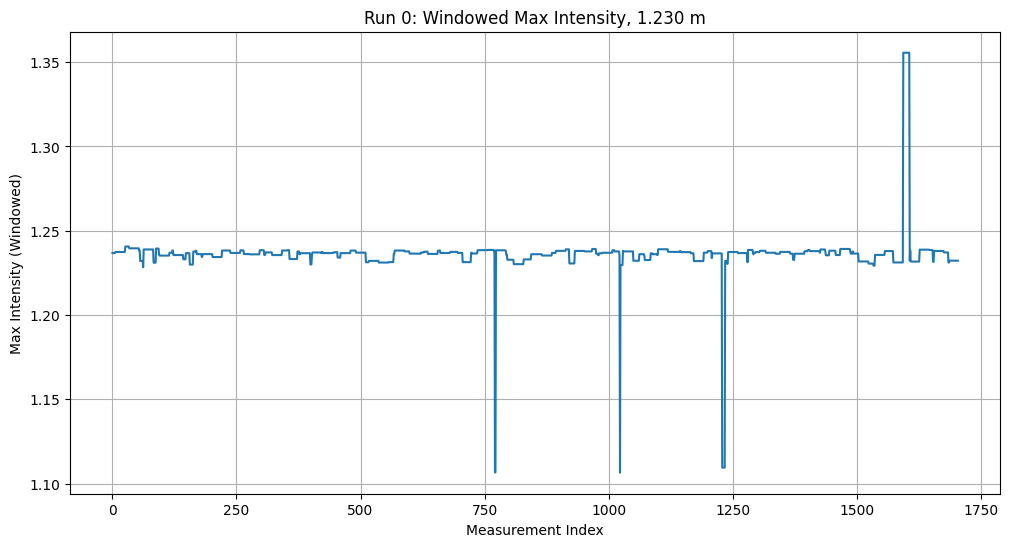

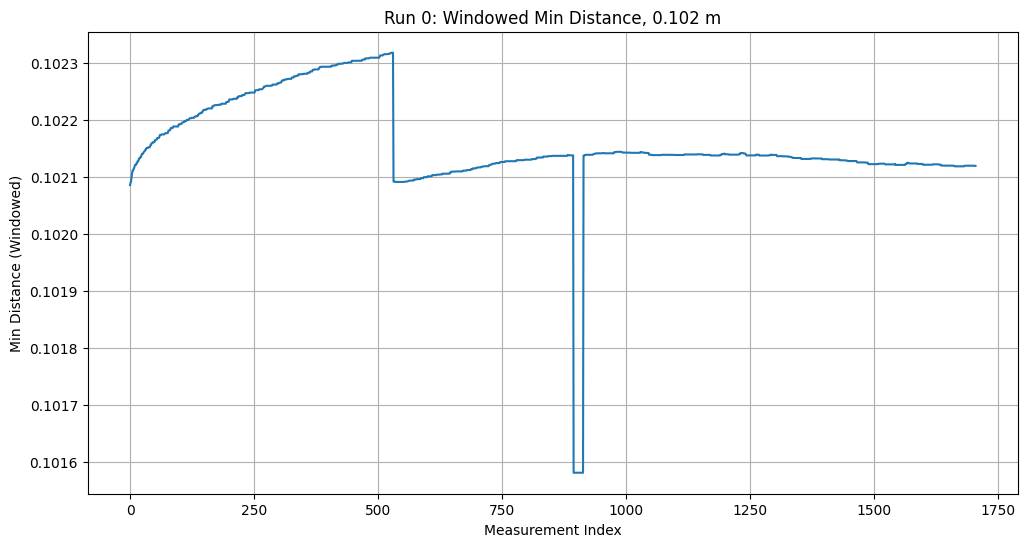

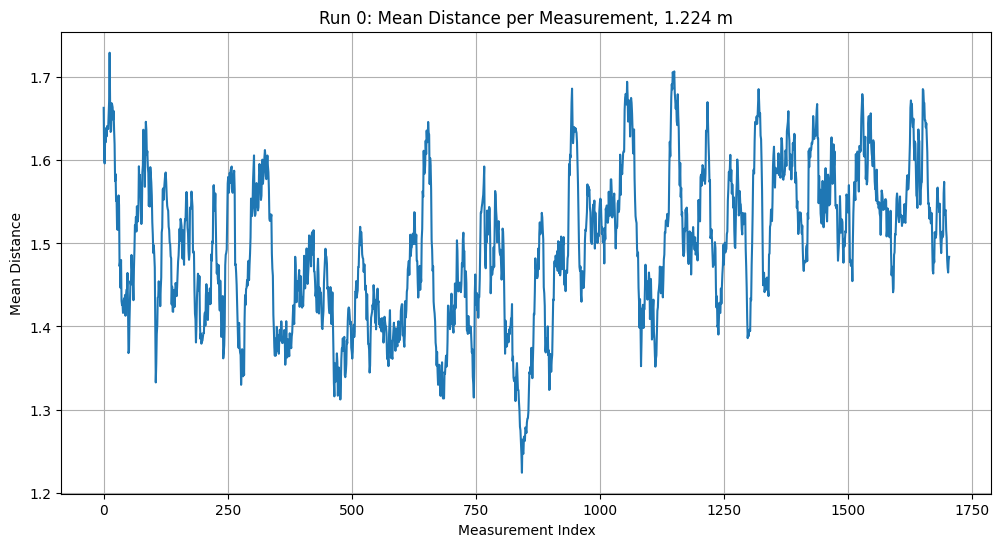

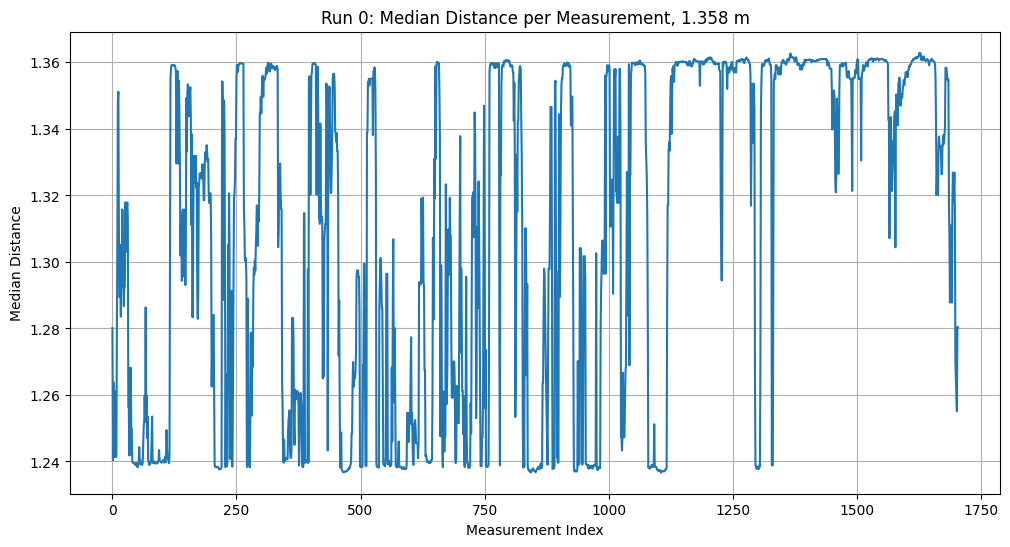

In [13]:
plot.stats(awr1843_stats, run_index=0)

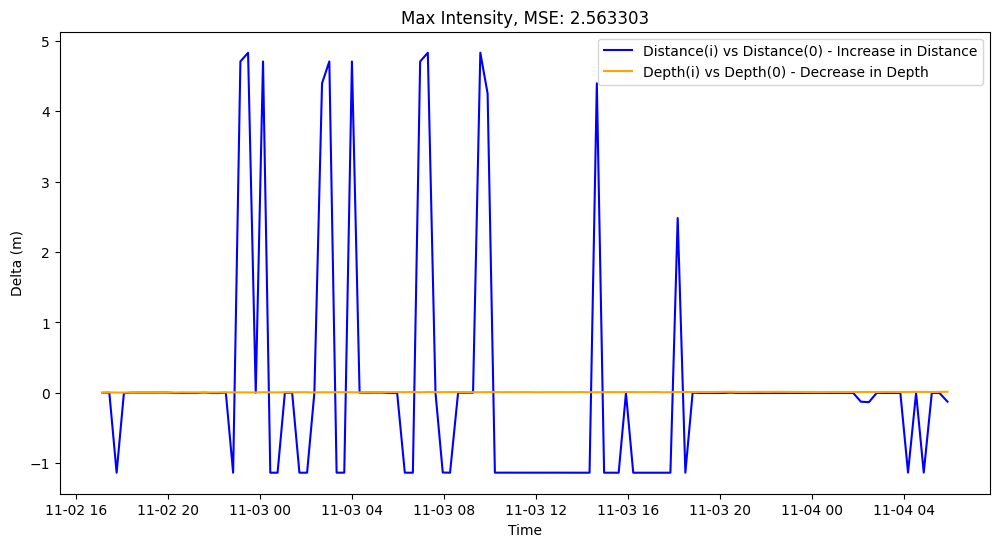

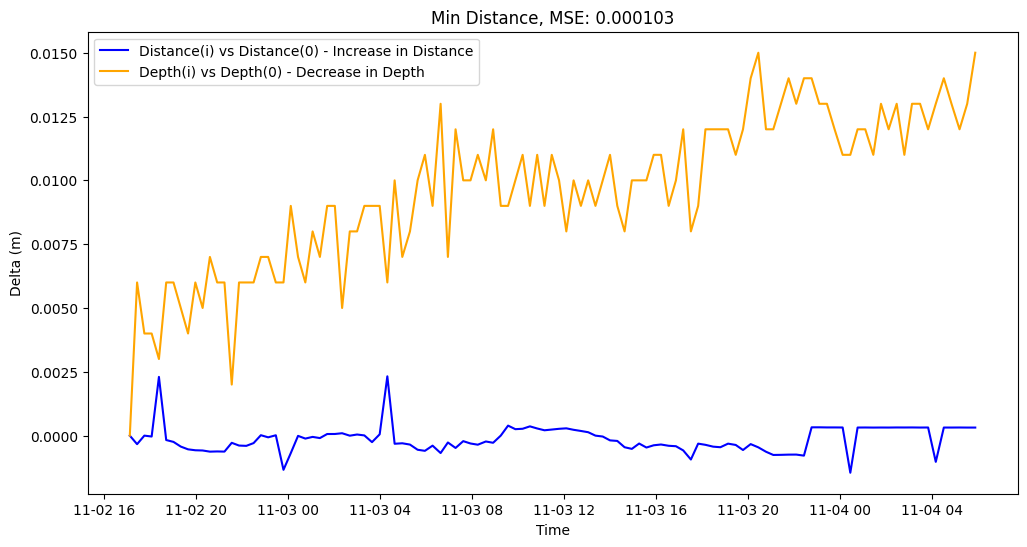

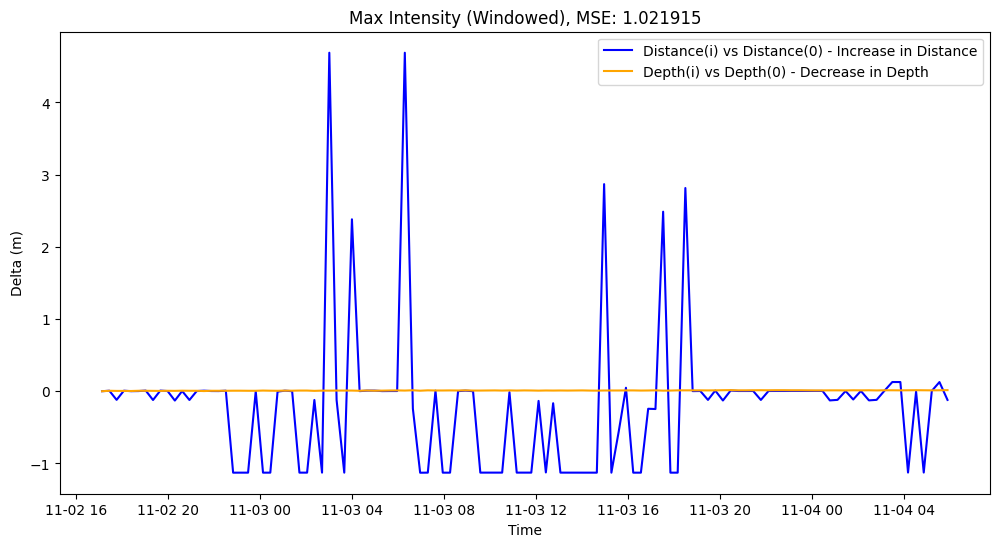

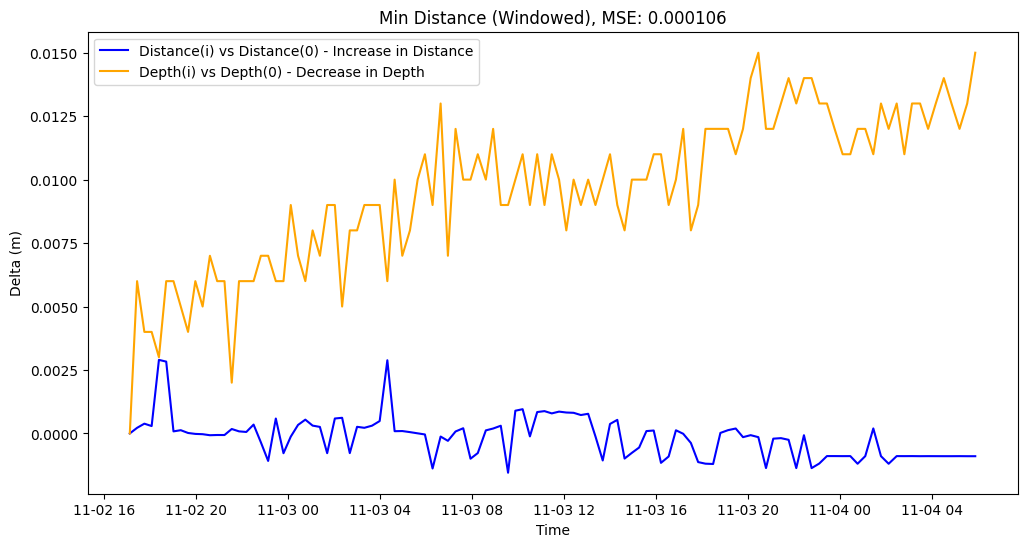

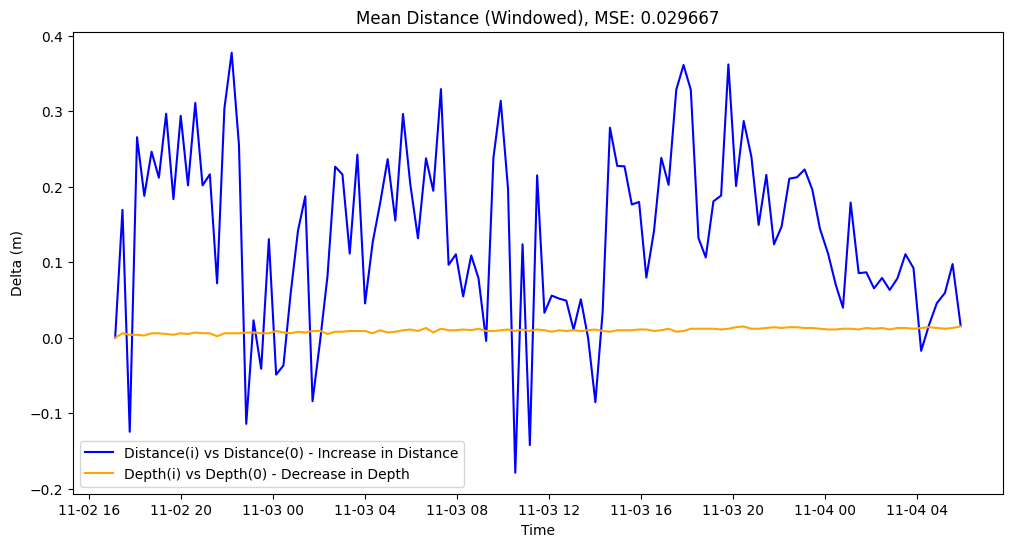

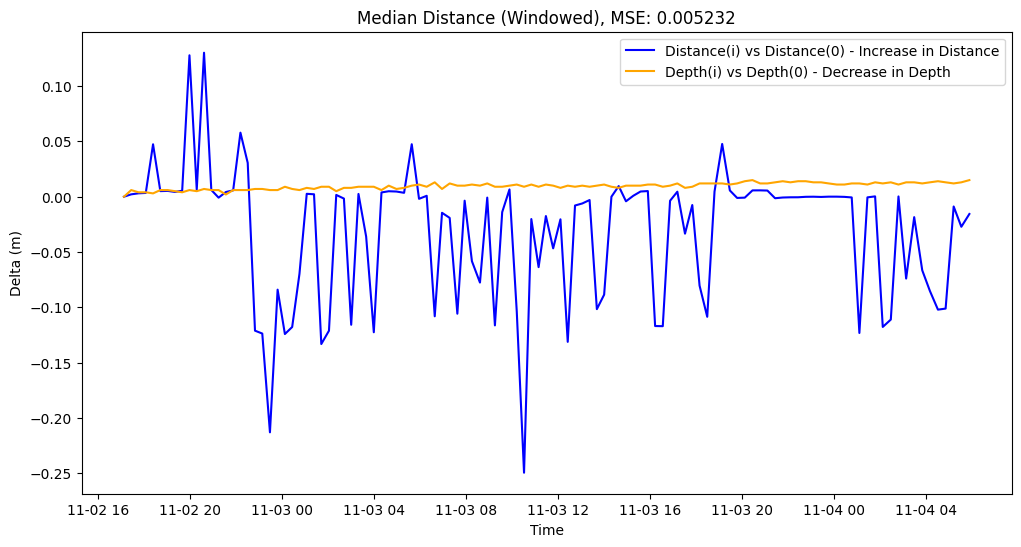

In [14]:
plot.deltas(dates, awr1843_stats, gt_depths_matched)

### IWR 1443

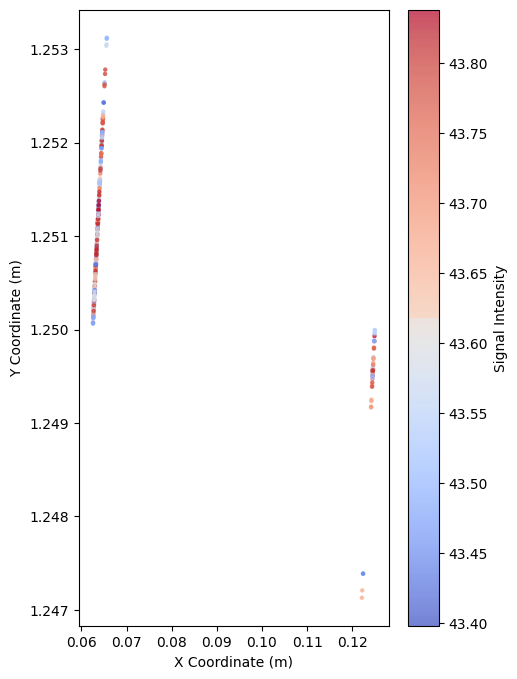

In [9]:
plot.points(iwr1443_filtered, run_index=0)

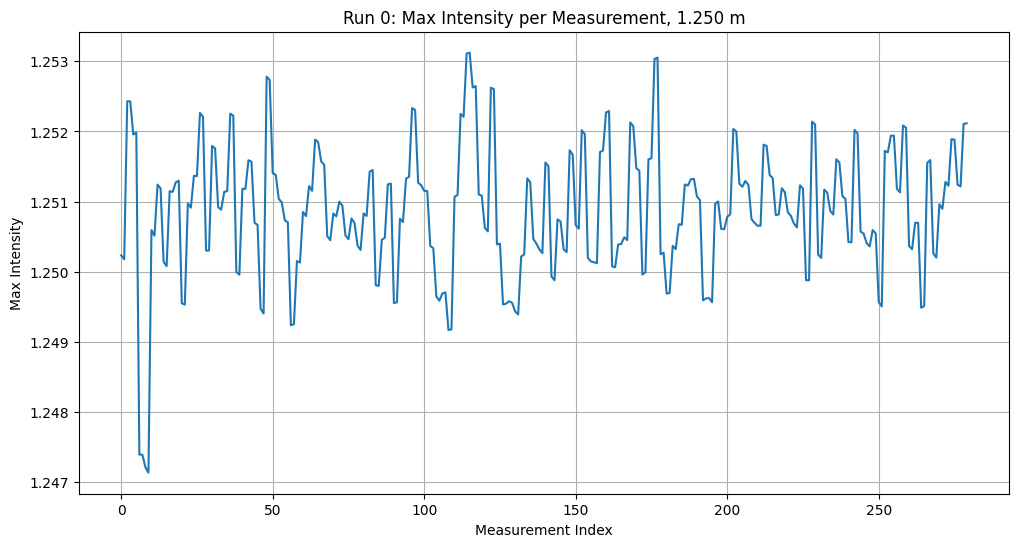

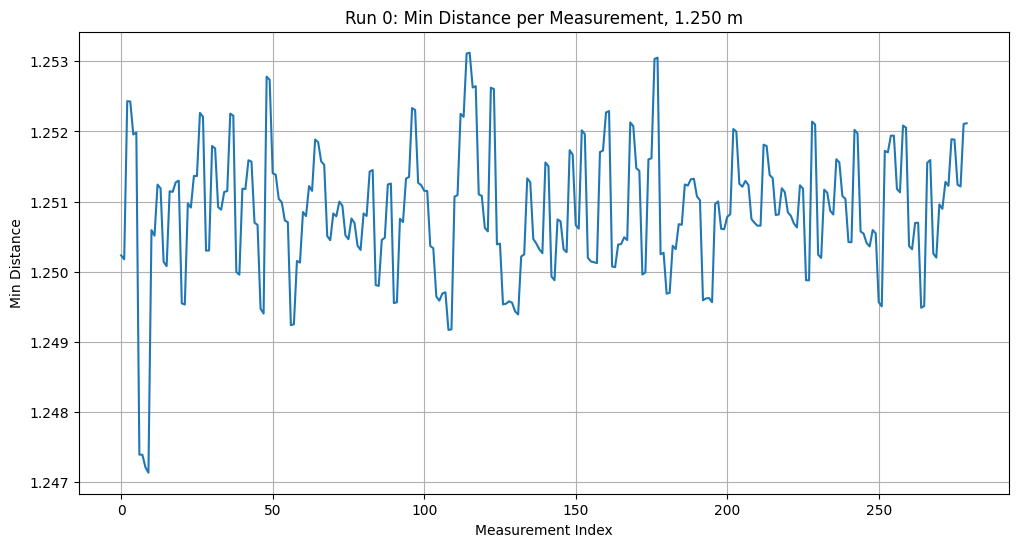

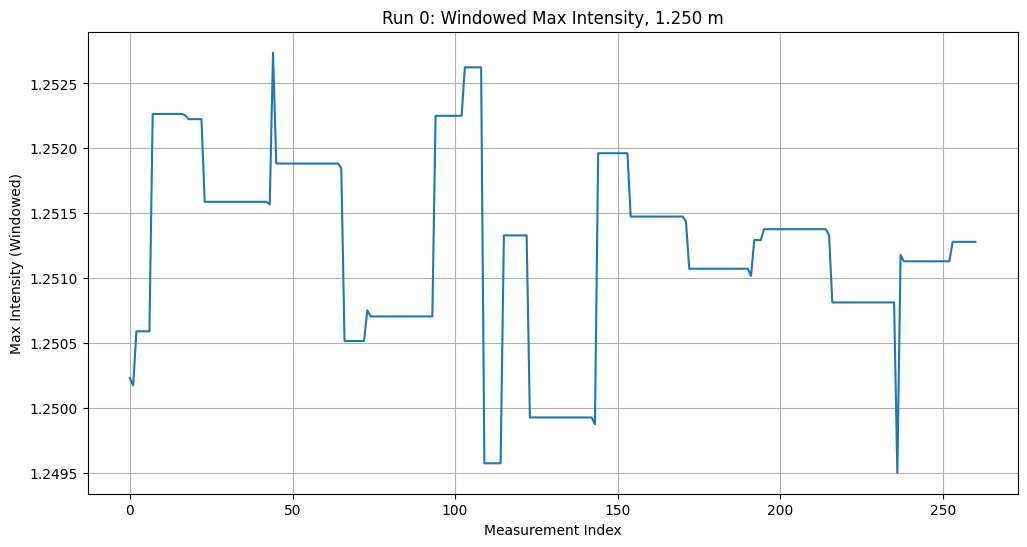

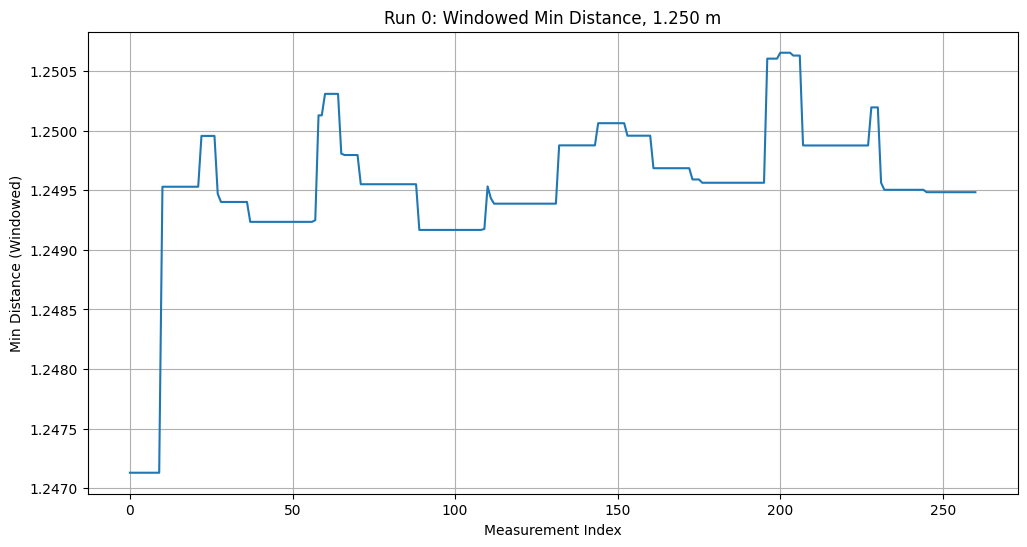

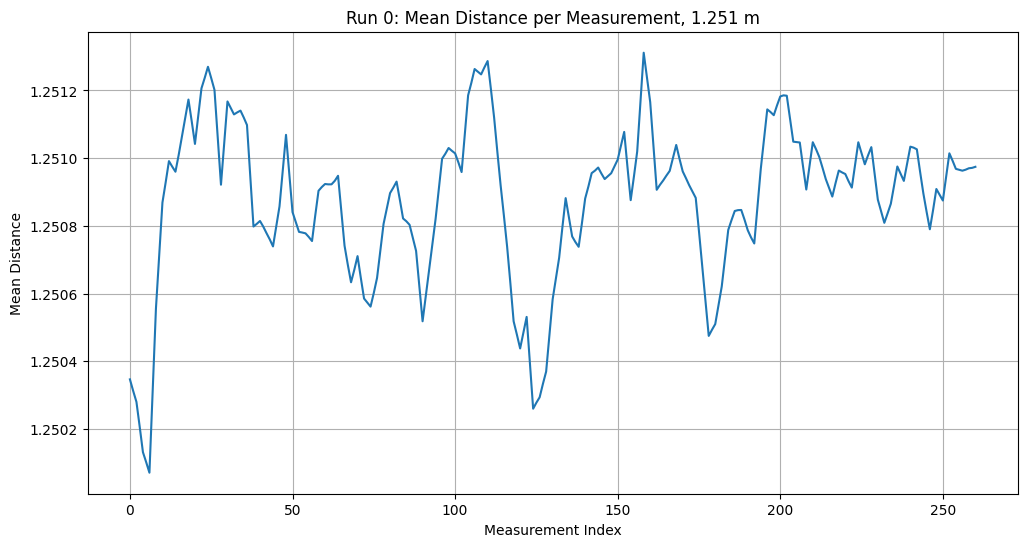

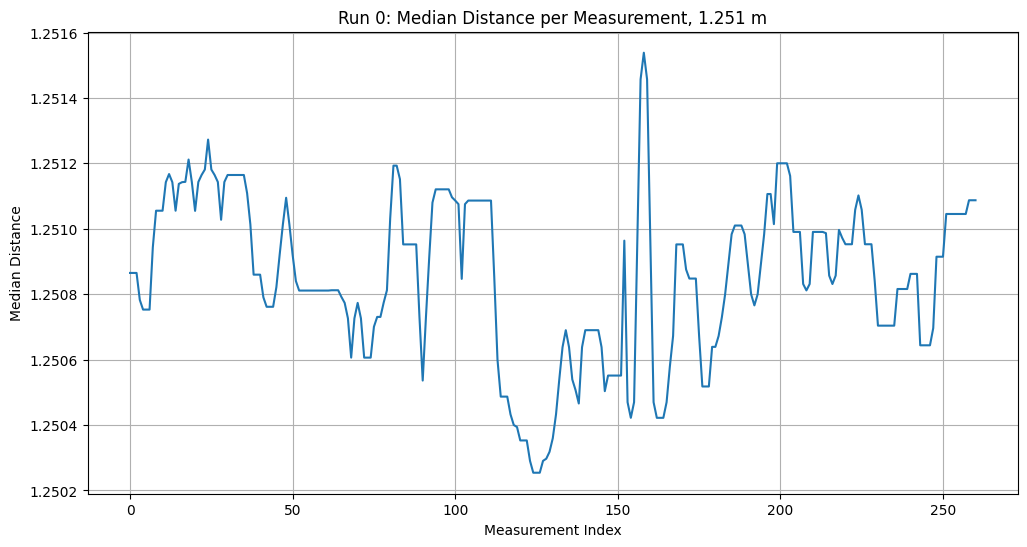

In [16]:
plot.stats(iwr1443_stats, run_index=0)

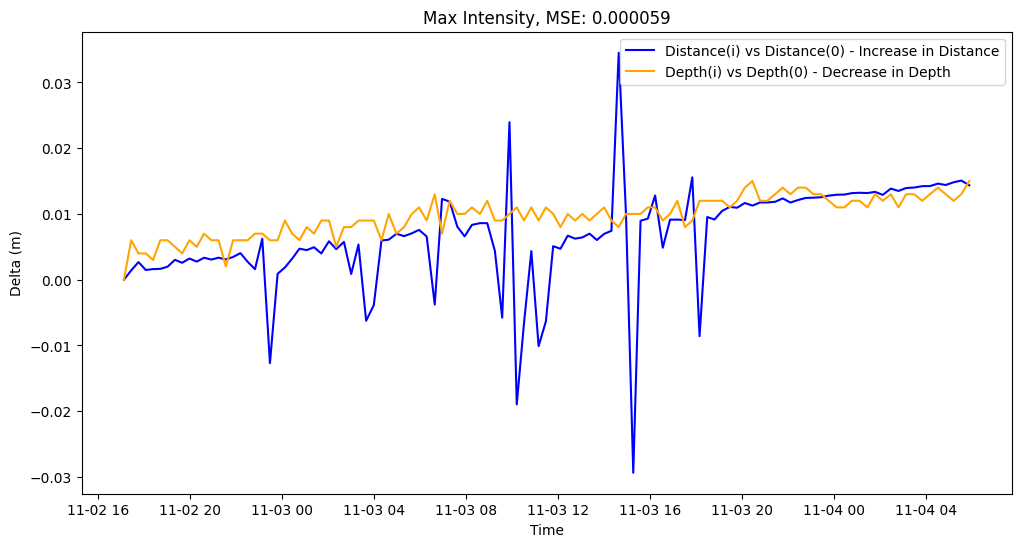

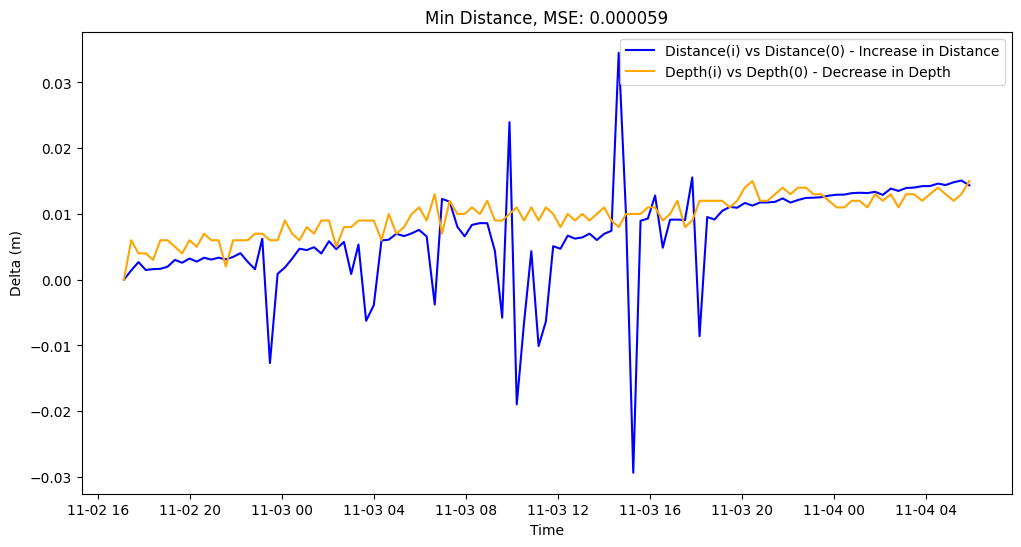

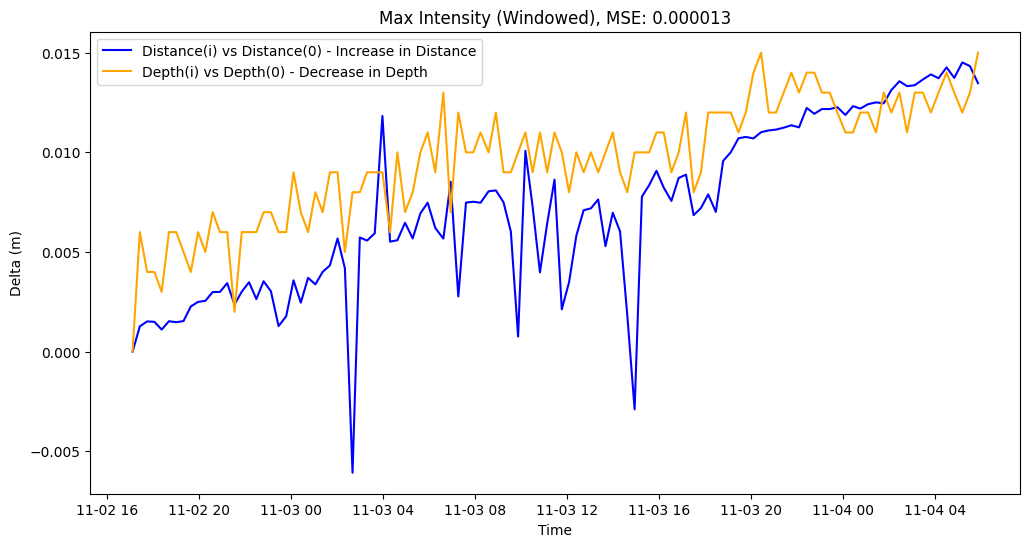

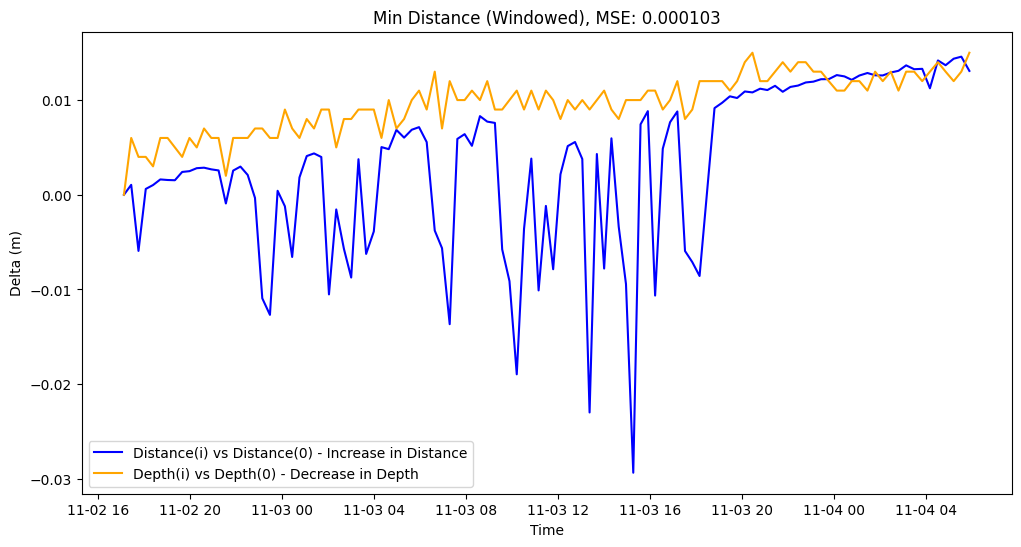

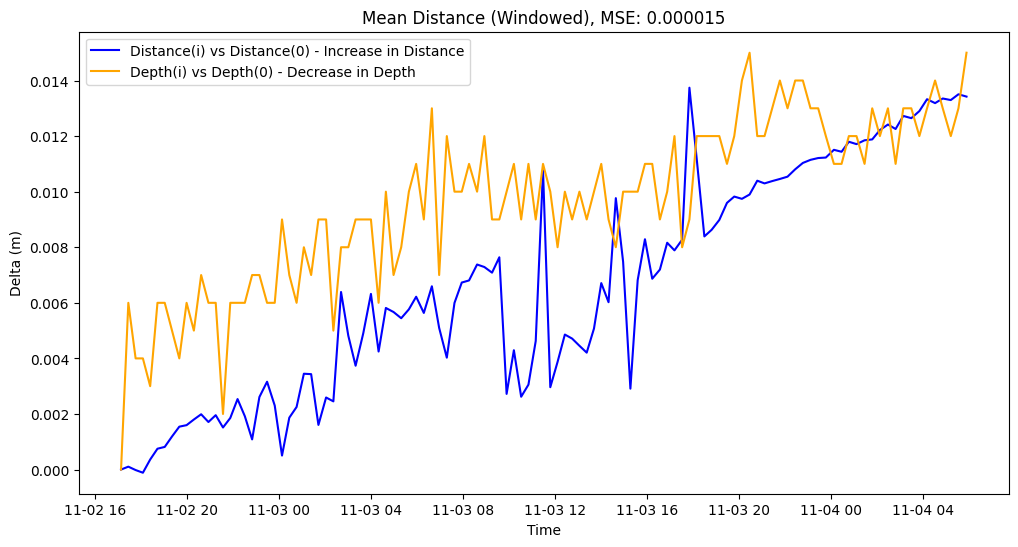

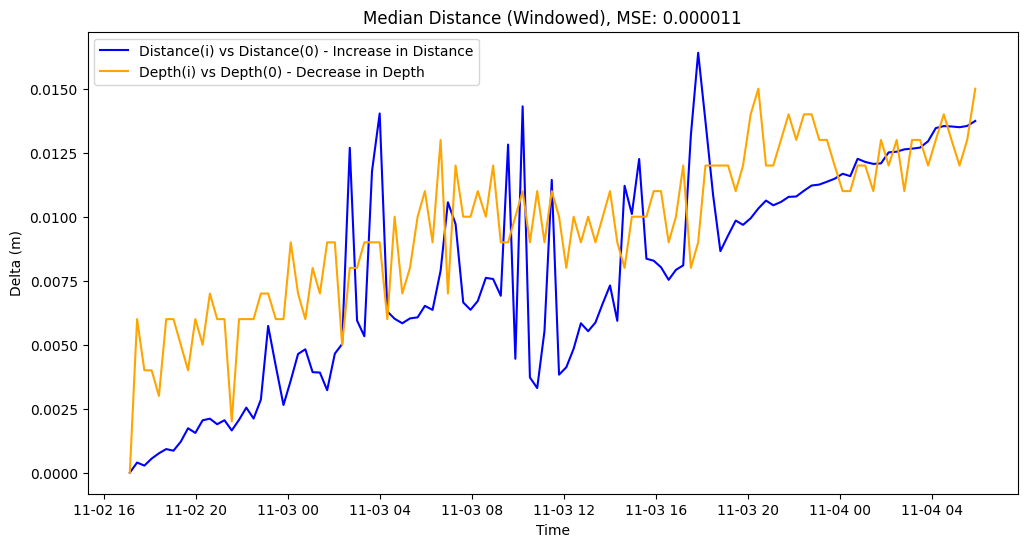

In [17]:
plot.deltas(dates, iwr1443_stats, gt_depths_matched)